In [1]:
### Network Slicing Recognition

The telecom industry is going through a massive digital transformation with the adoption of ML, AI, feedback-based automation and advanced analytics to handle the next generation applications and services. AI concepts are not new; the algorithms used by Machine Learning and Deep Learning are being currently implemented in various industries and technology verticals. With growing data and immense volume <br>

of information over 5G, the ability to predict data proactively, swiftly and with accuracy, is critically important. Data-driven decision making will be vital in future communication networks due to the traffic explosion and Artificial Intelligence (AI) will accelerate the 5G network performance. <br>

Mobile operators are looking for a programmable solution that will allow them to accommodate multiple independent tenants on the same physical infrastructure and 5G networks allow for end-to-end network resource allocation using the concept of Network Slicing (NS). <br>

Network Slicing will play a vital role in enabling a multitude of 5G applications, use cases, and services. Network slicing functions will provide an end-to-end isolation between slices with an ability to customize each slice based on the service demands (bandwidth, coverage, security, latency, reliability, etc). <br>

Your Task is to build a Machine Learning model that will be able to to proactively detect and eliminate threats based on incoming connections thereby selecting the most appropriate network slice, even in case of a network failure. <br>

**LTE/5g** - User Equipment categories or classes to define the performance specifications <br>
**Packet Loss Rate** - number of packets not received divided by the total number of packets sent. <br>
**Packet Delay** - The time for a packet to be received. <br>
**Slice type** - network configuration that allows multiple networks (virtualized and independent) <br>
**GBR** - Guaranteed Bit Rate <br>
**Healthcare** - Usage in Healthcare (1 or 0) <br>
**Industry 4.0** - Usage in Digital Enterprises(1 or 0) <br>
**IoT Devices** - Usage <br>
**Public Safety** - Usage for public welfare and safety purposes (1 or 0) <br>
**Smart City & Home** - usage in daily household chores <br>
**Smart Transportation** - usage in public transportation <br>
**Smartphone** - whether used for smartphone cellular data <br>

In [2]:
###! pip install neattext

In [3]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sn

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [4]:
##! pip uninstall numpy
##! pip install numpy==1.20

In [5]:
###!mkdir ~/.kaggle

In [6]:
###!cp /kaggle.json ~/.kaggle/

In [7]:
##! pip install kaggle
##!pip install keras-tuner

In [8]:
###!kaggle datasets download -d gauravduttakiit/network-slicing-recognition

In [9]:
###!unzip /content/network-slicing-recognition.zip

In [10]:
train_dataset = pd.read_csv("/content/train_dataset.csv")
test_dataset = pd.read_csv("/content/test_dataset.csv")

In [11]:
print(train_dataset.shape, test_dataset.shape)

(31583, 17) (31584, 16)


In [12]:
test_dataset['slice Type'] = 0

In [13]:
train_dataset = train_dataset.reset_index()
test_dataset = test_dataset.reset_index()
#train_dataset.rename(columns = { "index" : "ID"}, inplace = True)
#test_dataset.rename(columns = { "index" : "ID"}, inplace = True)

In [14]:
print(train_dataset.columns, train_dataset.shape)

Index(['index', 'LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay',
       'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object') (31583, 18)


In [15]:
train_dataset['slice Type'].value_counts()

1    16799
3     7392
2     7392
Name: slice Type, dtype: int64

In [16]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

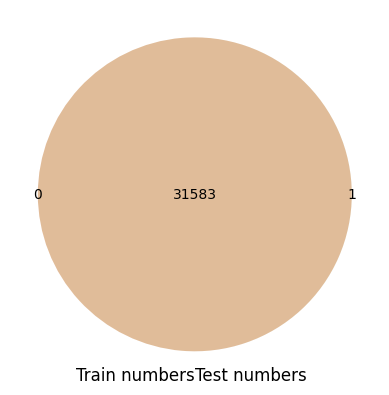

In [17]:
set_numbers_train = set(train_dataset[['index']].drop_duplicates().sort_values(by = 'index')['index'].tolist())
set_numbers_test = set(test_dataset[['index']].drop_duplicates().sort_values(by = 'index')['index'].tolist())
venn2((set_numbers_train, set_numbers_test), set_labels = ('Train numbers', 'Test numbers'))

In [18]:
train_dataset.columns

Index(['index', 'LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay',
       'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [19]:
###! pip install klib

In [20]:
import klib

In [21]:
train_dataset = klib.clean_column_names(train_dataset)
test_dataset = klib.clean_column_names(test_dataset)

In [22]:
train_dataset = klib.convert_datatypes(train_dataset)
test_dataset = klib.convert_datatypes(test_dataset)

In [23]:
train_dataset.columns

Index(['index', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

### Anomaly Detection Using One-Class SVM


In [24]:
from sklearn import svm

In [25]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(train_dataset)

OneClassSVM(gamma=0.1, nu=0.05)

In [26]:
pred = clf.predict(train_dataset)

# inliers are labeled 1, outliers are labeled -1
normal = train_dataset[pred == 1]
abnormal = train_dataset[pred == -1]

In [27]:
print(normal.shape, abnormal.shape)

(18373, 18) (13210, 18)


In [28]:
normal.columns

Index(['index', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [29]:
train_dataset = normal

In [30]:
print(train_dataset.shape)
print(train_dataset.columns)

(18373, 18)
Index(['index', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')


In [31]:
test_dataset['slice_type'] = 0

In [32]:
klib.cat_plot(train_dataset)

No columns with categorical data were detected.


In [33]:
klib.corr_interactive_plot(train_dataset)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='index', ylabel='Density'>

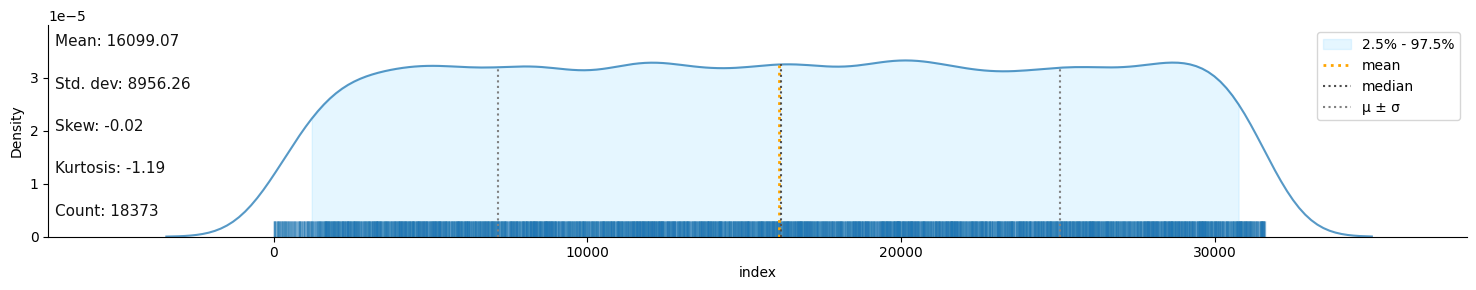

In [34]:
klib.dist_plot(train_dataset)

In [35]:
klib.missingval_plot(train_dataset)

No missing values found in the dataset.


In [36]:
klib.corr_mat(train_dataset)

,index,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,slice_type
index,1.00,-0.02,-0.00,0.02,0.01,0.00,-0.00,0.00,-0.00,-0.01,-0.01,-0.01,0.00,0.00,0.01,-0.00,0.00,-0.00
lte_5g_category,-0.02,1.00,-0.01,0.02,-0.02,0.10,-0.10,-0.01,0.01,-0.03,0.02,0.05,0.02,0.02,0.05,0.02,-0.08,0.08
time,-0.00,-0.01,1.00,0.01,-0.01,0.00,-0.00,-0.01,0.01,-0.00,-0.01,0.00,-0.00,0.00,0.01,-0.00,0.00,-0.00
packet_loss_rate,0.02,0.02,0.01,1.00,0.31,0.17,-0.17,-0.02,0.02,-0.17,-0.17,-0.22,0.39,-0.18,0.58,-0.18,-0.07,-0.10
packet_delay,0.01,-0.02,-0.01,0.31,1.00,-0.19,0.19,0.42,-0.42,-0.13,-0.24,-0.28,0.44,-0.25,0.20,-0.24,0.27,-0.39
io_t,0.00,0.10,0.00,0.17,-0.19,1.00,-1.00,-0.12,0.12,-0.32,0.26,0.39,0.27,0.27,0.39,0.26,-0.81,0.91
lte_5g,-0.00,-0.10,-0.00,-0.17,0.19,-1.00,1.00,0.12,-0.12,0.32,-0.26,-0.39,-0.27,-0.27,-0.39,-0.26,0.81,-0.91
gbr,0.00,-0.01,-0.01,-0.02,0.42,-0.12,0.12,1.00,-1.00,0.04,-0.21,0.05,0.28,-0.22,0.04,-0.22,0.10,-0.32
non_gbr,-0.00,0.01,0.01,0.02,-0.42,0.12,-0.12,-1.00,1.00,-0.04,0.21,-0.05,-0.28,0.22,-0.04,0.22,-0.10,0.32
ar_vr_gaming,-0.01,-0.03,-0.00,-0.17,-0.13,-0.32,0.32,0.04,-0.04,1.00,-0.08,-0.12,-0.09,-0.09,-0.13,-0.08,-0.30,-0.29


In [37]:
train_dataset.columns

Index(['index', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [38]:
# Checking for outliers in the continuous variables
num_train_dataset = train_dataset[['index', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type']]


In [39]:
train_dataset['slice_type'].value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [40]:
y_train = train_dataset['slice_type']
x_train = train_dataset.drop('slice_type', axis = 1)
y_test = test_dataset['slice_type']
x_test = test_dataset.drop('slice_type', axis = 1)

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x_train, y_train)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [42]:
import matplotlib.pyplot as plt

In [43]:
feature_importance_normalized

array([2.23385989e-05, 5.35038464e-04, 5.80663207e-05, 2.63614706e-02,
       1.31715736e-01, 7.04401988e-02, 2.46897826e-01, 6.95286066e-02,
       8.62630973e-02, 3.79345537e-03, 7.44487335e-03, 2.30854823e-02,
       2.71210850e-02, 3.25027780e-02, 6.35507569e-02, 3.85865774e-02,
       1.55860310e-01])

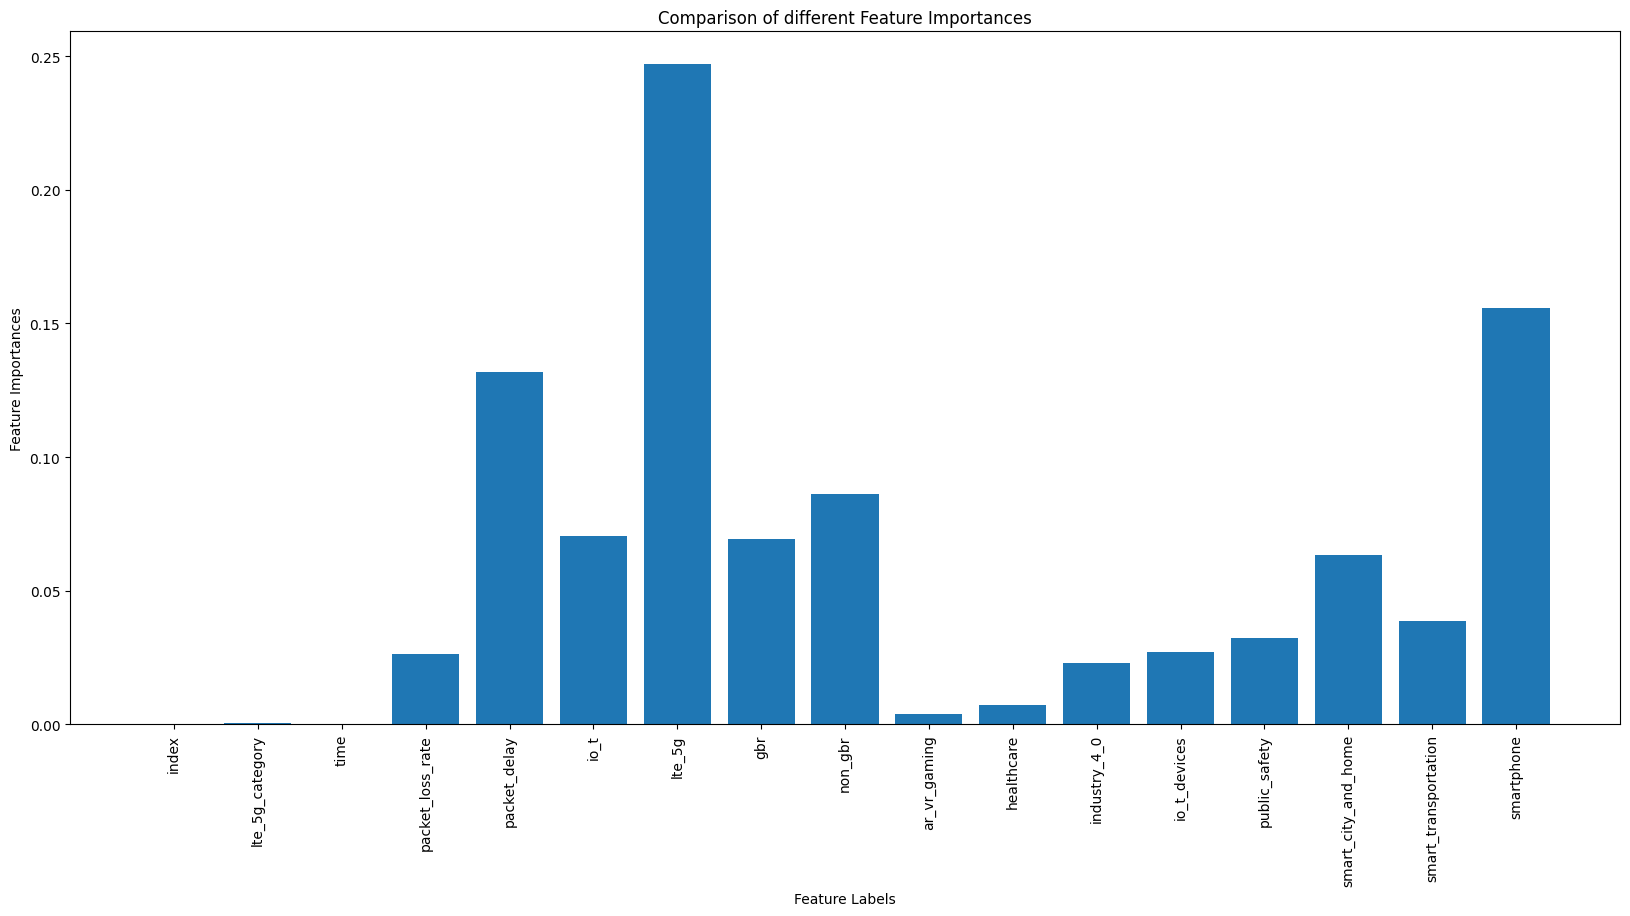

In [44]:
plt.figure(figsize = [20,9])
plt.bar(x_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation = 90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [45]:
x_train.columns

Index(['index', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')

In [46]:
x_train2 = x_train[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']]

In [47]:
x_test2 = x_test[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']]

In [48]:
print(x_train2.shape, x_test2.shape)
print(y_train.shape, y_test.shape)

(18373, 15) (31584, 15)
(18373,) (31584,)


In [49]:
y_train.value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [50]:
x_train2 = pd.DataFrame(x_train2)

In [51]:
x_train2.head(4)

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,14,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0
4,9,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0
5,19,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
8,8,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1


In [52]:
x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)

In [53]:
x_train2.astype(float).corr()

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
lte_5g_category,1.000000,0.022254,-0.015085,0.095605,-0.095605,-0.007156,0.007156,-0.034010,0.018408,0.045106,0.019458,0.019485,0.047347,0.019787,-0.075152
packet_loss_rate,0.022254,1.000000,0.306436,0.170858,-0.170858,-0.022315,0.022315,-0.168172,-0.174050,-0.216202,0.389878,-0.182358,0.578743,-0.176111,-0.067416
packet_delay,-0.015085,0.306436,1.000000,-0.187910,0.187910,0.424124,-0.424124,-0.127614,-0.238384,-0.284384,0.437355,-0.249763,0.200818,-0.241206,0.268831
io_t,0.095605,0.170858,-0.187910,1.000000,-1.000000,-0.122402,0.122402,-0.321284,0.260863,0.385515,0.265817,0.273314,0.394585,0.263951,-0.807524
lte_5g,-0.095605,-0.170858,0.187910,-1.000000,1.000000,0.122402,-0.122402,0.321284,-0.260863,-0.385515,-0.265817,-0.273314,-0.394585,-0.263951,0.807524
gbr,-0.007156,-0.022315,0.424124,-0.122402,0.122402,1.000000,-1.000000,0.037476,-0.213782,0.045353,0.281337,-0.223986,0.035940,-0.216313,0.099995
non_gbr,0.007156,0.022315,-0.424124,0.122402,-0.122402,-1.000000,1.000000,-0.037476,0.213782,-0.045353,-0.281337,0.223986,-0.035940,0.216313,-0.099995
ar_vr_gaming,-0.034010,-0.168172,-0.127614,-0.321284,0.321284,0.037476,-0.037476,1.000000,-0.083811,-0.123860,-0.085403,-0.087812,-0.126774,-0.084803,-0.299119
healthcare,0.018408,-0.174050,-0.238384,0.260863,-0.260863,-0.213782,0.213782,-0.083811,1.000000,-0.087228,-0.060145,-0.061841,-0.089280,-0.059722,-0.210653
industry_4_0,0.045106,-0.216202,-0.284384,0.385515,-0.385515,0.045353,-0.045353,-0.123860,-0.087228,1.000000,-0.088885,-0.091391,-0.131942,-0.088261,-0.311313


In [54]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.columns)
    print(dataset.shape)

In [55]:
correlation(x_train2, 0.95)

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')
(18373, 15)


In [56]:
print(x_train2.columns, x_train2.shape)
print(x_test2.columns, x_test2.shape)


Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object') (18373, 15)
Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object') (31584, 15)


### Standard Scaler

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train2),columns=x_train2.columns)
x_train_scaled.head()

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,0.496569,-0.716409,-0.981216,1.073740,-1.073740,-0.87995,0.87995,-0.344976,-0.242948,-0.359040,-0.247562,3.928589,-0.367487,-0.245824,-0.867071
1,-0.319527,1.574868,-0.602200,1.073740,-1.073740,-0.87995,0.87995,-0.344976,-0.242948,-0.359040,-0.247562,-0.254544,2.721185,-0.245824,-0.867071
2,1.312664,-0.716409,-0.981216,1.073740,-1.073740,-0.87995,0.87995,-0.344976,-0.242948,2.785209,-0.247562,-0.254544,-0.367487,-0.245824,-0.867071
3,-0.482746,-0.487488,0.345339,-0.931324,0.931324,-0.87995,0.87995,-0.344976,-0.242948,-0.359040,-0.247562,-0.254544,-0.367487,-0.245824,1.153308
4,-0.645965,-0.716409,-0.981216,1.073740,-1.073740,-0.87995,0.87995,-0.344976,4.116113,-0.359040,-0.247562,-0.254544,-0.367487,-0.245824,-0.867071


In [58]:
x_test_scaled=pd.DataFrame(scaler.fit_transform(x_test2),columns=x_test2.columns)
x_test_scaled.head()

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,0.664781,-0.482940,-0.136290,-0.938083,0.938083,1.124027,-1.124027,2.896828,-0.25058,-0.365662,-0.250722,-0.246559,-0.362819,-0.248791,-0.860496
1,0.500168,-0.712444,-0.982767,1.066004,-1.066004,-0.889658,0.889658,-0.345205,-0.25058,-0.365662,-0.250722,-0.246559,-0.362819,4.019440,-0.860496
2,0.006327,-0.482940,-0.606555,1.066004,-1.066004,1.124027,-1.124027,-0.345205,-0.25058,2.734762,-0.250722,-0.246559,-0.362819,-0.248791,-0.860496
3,1.487848,-0.482940,-0.606555,1.066004,-1.066004,1.124027,-1.124027,-0.345205,-0.25058,2.734762,-0.250722,-0.246559,-0.362819,-0.248791,-0.860496
4,-1.475194,-0.482940,-0.606555,-0.938083,0.938083,-0.889658,0.889658,2.896828,-0.25058,-0.365662,-0.250722,-0.246559,-0.362819,-0.248791,-0.860496


In [59]:
print(x_train_scaled.shape, x_test_scaled.shape)

(18373, 15) (31584, 15)


In [60]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [61]:
# Install libraries
#!pip install boostaroota
#!pip install h2o
#!pip install ppscore
#!pip install imblearn

In [62]:
#! pip install optuna
#! pip install shap

In [63]:
###! pip install catboost

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn import model_selection as sk_model_selection
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
from sklearn import metrics
import optuna
from boostaroota import BoostARoota
from sklearn.metrics import log_loss
from optuna.samplers import TPESampler
import functools
from functools import partial
import xgboost as xgb
import joblib
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import statsmodels.api as sm
import pylab
from xgboost import plot_tree
import shap
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, auc, f1_score, \
    average_precision_score, accuracy_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import h2o
from h2o.automl import H2OAutoML
from catboost import Pool, CatBoostRegressor, cv
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Concatenate, LSTM, GRU
from tensorflow.keras.layers import Bidirectional, Multiply
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


SEED = 42

In [65]:
x_train_scaled.columns

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')

In [66]:
x_test_scaled.columns

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')

In [67]:
feature_cols = ['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']

In [73]:
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
try:
    from imblearn.over_sampling import ADASYN
except:
    pass
try:
    import ppscore as pps
except:
    pass

from imblearn.over_sampling import ADASYN

In [74]:
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,13 mins 48 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_wqymo5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,23.99 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [75]:
print(train_dataset.shape, test_dataset.shape)

(18373, 18) (31584, 18)


In [76]:
h2o_train_df = h2o.H2OFrame(train_dataset)
h2o_test_df = h2o.H2OFrame(test_dataset)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [77]:
aml = H2OAutoML(max_models = 35, seed = 100, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True, max_after_balance_size=0.3)

In [78]:
train_dataset.columns

Index(['index', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [79]:
features = ['index', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']
output = 'slice_type'

In [80]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)


In [81]:
aml.train(x = features, y = output, training_frame = h2o_train_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_2_20240221_95129


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          5461                   2            6            2.94          3             7             4.02

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.0
RMSE: 0.0
MAE: 0.0
RMSLE: 0.0
Mean Residual Deviance: 0.0

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.0
RMSE: 0.0
MAE: 0.0
RMSLE: 0.0
Mean Residual Deviance: 0.0

Cross-Validation Metrics Summary: 
                        mean    sd    cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ------  ----  ------------  ------------  ------------  ------------  ------------
mae                     0       0     0             0             0             0             0
mean_residual_deviance  0       0     0             0             0             0             0
mse                     0       0     0             0             0             0             0
r2                      1       0     1             1             1             1             1
residual_deviance       0       0     0             0             0             0             0
rmse                    0       0     0             0             0             0             0
rmsle                   0       0     0             0             0             0             0

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-21 09:52:18  4.930 sec   0                  nan              nan             nan
    2024-02-21 09:52:18  4.976 sec   5                  0                0               0
    2024-02-21 09:52:18  5.029 sec   10                 0                0               0
    2024-02-21 09:52:18  5.072 sec   15                 0                0               0
    2024-02-21 09:52:18  5.127 sec   20                 0                0               0
    2024-02-21 09:52:18  5.204 sec   25                 0                0               0
    2024-02-21 09:52:18  5.267 sec   30                 0                0               0
    2024-02-21 09:52:18  5.344 sec   35                 0                0               0
    2024-02-21 09:52:18  5.413 sec   40                 0                0               0
    2024-02-21 09:52:18  5.483 sec   45                 0                0               0
    2024-02-21 09:52:19  5.560 sec   50                 0                0               0

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
lte_5g                174345                 1                    0.328602
io_t                  145183                 0.832734             0.273638
packet_delay          116861                 0.670287             0.220258
smartphone            34613.2                0.198533             0.0652384
public_safety         15720.8                0.090171             0.0296304
packet_loss_rate      13198.1                0.0757011            0.0248755
smart_transportation  7059.24                0.0404901            0.0133051
gbr                   5947.3                 0.0341123            0.0112094
smart_city_and_home   4591.72                0.026337             0.00865441
industry_4_0          4192.84                0.0240491            0.0079026
healthcare            3875.07             

#### Model leaderboard

In [82]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DRF_1_AutoML_2_20240221_95129,0,0,0,0,0
GBM_5_AutoML_2_20240221_95129,7.54682e-07,5.69545e-13,6.21247e-07,2.70514e-07,5.69545e-13
GBM_grid_1_AutoML_2_20240221_95129_model_2,7.54682e-07,5.69545e-13,6.21247e-07,2.70514e-07,5.69545e-13
GBM_1_AutoML_2_20240221_95129,7.54682e-07,5.69545e-13,6.21247e-07,2.70514e-07,5.69545e-13
GBM_4_AutoML_2_20240221_95129,7.54682e-07,5.69545e-13,6.21247e-07,2.70514e-07,5.69545e-13
GBM_2_AutoML_2_20240221_95129,7.54682e-07,5.69545e-13,6.21247e-07,2.70514e-07,5.69545e-13
XGBoost_grid_1_AutoML_2_20240221_95129_model_3,8.13005e-06,6.60978e-11,6.70222e-06,2.79717e-06,6.60978e-11
XGBoost_grid_1_AutoML_2_20240221_95129_model_4,8.13615e-06,6.6197e-11,6.69312e-06,2.79782e-06,6.6197e-11
XGBoost_grid_1_AutoML_2_20240221_95129_model_6,1.08735e-05,1.18233e-10,9.58954e-06,3.66615e-06,1.18233e-10
XGBoost_3_AutoML_2_20240221_95129,1.08934e-05,1.18666e-10,8.55583e-06,3.52064e-06,1.18666e-10


In [83]:
preds = aml.predict(h2o_test_df)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [84]:
preds.columns

['predict']

In [86]:
preds.head(2)

predict
1
3


In [87]:
print(test_dataset.shape)

(31584, 18)


In [88]:
test_dataset.to_csv("/content/test.csv")

In [89]:
test2 = pd.read_csv("/content/test.csv")

In [90]:
sub = preds[0].as_data_frame()
test2['Prediction_Value'] = sub
test2.to_csv('h20.ai-automl.csv',index = False)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [91]:
test2.columns

Index(['Unnamed: 0', 'index', 'lte_5g_category', 'time', 'packet_loss_rate',
       'packet_delay', 'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming',
       'healthcare', 'industry_4_0', 'io_t_devices', 'public_safety',
       'smart_city_and_home', 'smart_transportation', 'smartphone',
       'slice_type', 'Prediction_Value'],
      dtype='object')

In [93]:
test2["Prediction_Value_int"] = test2.Prediction_Value.apply(np.round)

In [94]:
test2["Prediction_Value_int"] = test2["Prediction_Value_int"].astype(int)

In [96]:
print(test2["Prediction_Value_int"].value_counts())

1    16800
3     7392
2     7392
Name: Prediction_Value_int, dtype: int64


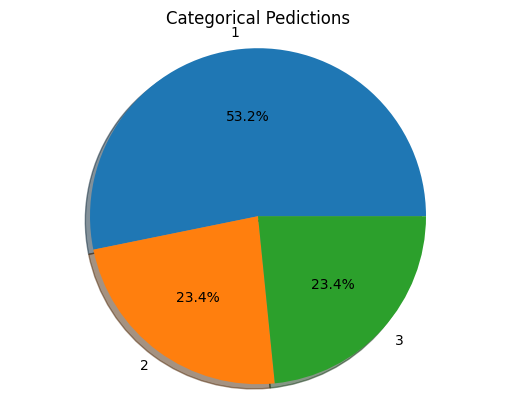

In [97]:
labels = test2['Prediction_Value_int'].astype('category').cat.categories.tolist()
counts = test2['Prediction_Value_int'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
plt.title("Categorical Pedictions")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


In [98]:
from sklearn import metrics

In [99]:
hamming_loss = metrics.hamming_loss(y_test, test2["Prediction_Value_int"])
hamming_loss

1.0